In [28]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import HashingVectorizer
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Imputer
from matplotlib import pyplot as plt

In [3]:
#Read the data using the Unnamed (probably id) as index
url = 'https://s3.amazonaws.com/drivendata/data/4/public/81e8f2de-9915-4934-b9ae-9705685c9d50.csv'
training = pd.read_csv(url, index_col='Unnamed: 0')

labels = ['Function', 'Object_Type', 'Operating_Status', 'Position_Type', 'Pre_K', 'Reporting', 
          'Sharing', 'Student_Type', 'Use']

numeric = ['FTE', 'Total']

categoric = [ 'Facility_or_Department', 'Function_Description', 
            'Fund_Description', 'Job_Title_Description', 'Location_Description', 
            'Object_Description', 'Position_Extra', 'Program_Description', 'SubFund_Description', 
            'Sub_Object_Description', 
            'Text_1', 'Text_2', 'Text_3', 'Text_4']

## Data cleaning

### Part 1: numeric data
First of all, the numeric columns `FTE` and `Total` must be cleaned. The outliers will be treated as `NaN` values and imputation will be applied to the missing data. 

The imputation was made considering the the mean of each `Object_Type` column category, each `NaN` was populated with a value based on the `Object_Type` category it belongs, if this information was `NaN` too, then the imput used `Total` or `FTE` average.

In [4]:
# Remove inconsistent data
training[training['FTE'] < 0] = np.nan
training[training['Total'] < 0] = np.nan

In [6]:
training[training['FTE'] < 0]

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1


In [7]:
training['Total'].describe()

count    3.518450e+05
mean     1.696423e+04
std      3.402292e+05
min      0.000000e+00
25%      1.384847e+02
50%      6.696800e+02
75%      4.999610e+03
max      1.297000e+08
Name: Total, dtype: float64

In [8]:
training.groupby('Object_Type')['Total'].mean()

Object_Type
Base Salary/Compensation       24145.844441
Benefits                         865.616621
Contracted Services            38163.380901
Equipment & Equipment Lease    11257.335020
NO_LABEL                       58545.010979
Other Compensation/Stipend      1604.962876
Other Non-Compensation         10646.892470
Rent/Utilities                 46610.910607
Substitute Compensation         1090.501980
Supplies/Materials              7745.381168
Travel & Conferences            1659.440688
Name: Total, dtype: float64

In [9]:
training['Total'].mean()

16964.228335602154

In [10]:
#Imputing data in Total column
def impute_func_total(data):
    if(pd.isnull(data['Object_Type'])):
        return 16964
    if(pd.isnull(data['Total'])):        
        if(data['Object_Type'] == 'Base Salary/Compensation'):
            return 24146
        if(data['Object_Type'] == 'Benefits'):
            return 38163
        if(data['Object_Type'] == 'Contracted Services'):
            return 24146
        if(data['Object_Type'] == 'Equipment & Equipment Lease'):
            return 11257
        if(data['Object_Type'] == 'NO_LABEL'):
            return 58545
        if(data['Object_Type'] == 'Other Compensation/Stipend'):
            return 1605
        if(data['Object_Type'] == 'Other Non-Compensation'):
            return 10646
        if(data['Object_Type'] == 'Rent/Utilities'):
            return 46611
        if(data['Object_Type'] == 'Substitute Compensation'):
            return 1090
        if(data['Object_Type'] == 'Supplies/Materials'):
            return 7745
        if(data['Object_Type'] == 'Travel & Conferences'):
            return 1659
    else:
        return data['Total']

In [11]:
training['Total'] = training.apply(impute_func_total, axis = 1)

In [5]:
training['FTE'].describe()

count    125849.000000
mean          0.427436
std           0.573810
min           0.000000
25%           0.001078
50%           0.133337
75%           1.000000
max          46.800000
Name: FTE, dtype: float64

In [17]:
#Put FET data greater than 1 in percentage 
mask = training['FTE'] > 1
df_ToAtt = training[mask]

training.loc[mask, 'FTE'] = df_ToAtt['FTE'].div(100)

In [19]:
training['FTE'].describe()

count    125849.000000
mean          0.397216
std           0.446708
min           0.000000
25%           0.001078
50%           0.080819
75%           1.000000
max           1.000000
Name: FTE, dtype: float64

In [20]:
training.groupby('Object_Type')['FTE'].mean()

Object_Type
Base Salary/Compensation       0.457632
Benefits                       0.000000
Contracted Services            0.000000
Equipment & Equipment Lease    0.000000
NO_LABEL                       0.748446
Other Compensation/Stipend     0.000107
Other Non-Compensation         0.000000
Rent/Utilities                 0.000000
Substitute Compensation        0.000059
Supplies/Materials             0.000000
Travel & Conferences           0.000000
Name: FTE, dtype: float64

In [21]:
training['FTE'].mean()

0.397215825398393

In [22]:
#Imputing data in FTE column
def impute_func_FTE(data):
    if(pd.isnull(data['Object_Type'])):
        return 0.40
    if(pd.isnull(data['FTE'])):        
        if(data['Object_Type'] == 'Base Salary/Compensation'):
            return 0.45
        if(data['Object_Type'] == 'Benefits'):
            return 0.0
        if(data['Object_Type'] == 'Contracted Services'):
            return 0.0
        if(data['Object_Type'] == 'Equipment & Equipment Lease'):
            return 0.0
        if(data['Object_Type'] == 'NO_LABEL'):
            return 0.75
        if(data['Object_Type'] == 'Other Compensation/Stipend'):
            return 0.000107
        if(data['Object_Type'] == 'Other Non-Compensation'):
            return 0.0
        if(data['Object_Type'] == 'Rent/Utilities'):
            return 0.0
        if(data['Object_Type'] == 'Substitute Compensation'):
            return 0.000059
        if(data['Object_Type'] == 'Supplies/Materials'):
            return 0.0
        if(data['Object_Type'] == 'Travel & Conferences'):
            return 0.0
    else:
        return data['FTE']

In [23]:
training['FTE'] = training.apply(impute_func_FTE, axis = 1)

In [24]:
training[numeric].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 2 columns):
FTE      400277 non-null float64
Total    400277 non-null float64
dtypes: float64(2)
memory usage: 9.2 MB


**Numeric data distribution after pre processing**

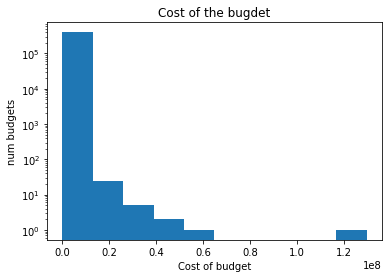

In [29]:
plt.hist(training['Total'], log=True)

# Add title and labels
plt.title('Cost of the bugdet')
plt.xlabel('Cost of budget')
plt.ylabel('num budgets')

plt.show()

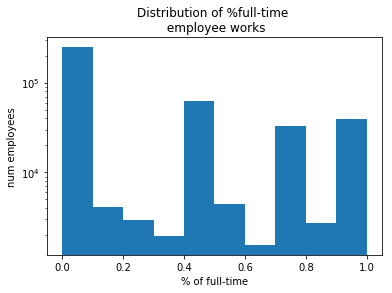

In [111]:
plt.hist(training['FTE'],  bins=10, log = True)

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

plt.show()

### Part 2: Categoric data

The strings must be normalized: symbols removed, all letters to lower case. Then, they can be transformed to numeric data.

In [35]:
for category in categoric:
    training[category] = training[category].str.lower()

In [36]:
#Check if the unique values decrease
training[categoric].nunique(dropna=False)

Facility_or_Department     176
Function_Description       655
Fund_Description           141
Job_Title_Description     3455
Location_Description       352
Object_Description         570
Position_Extra             580
Program_Description        418
SubFund_Description        267
Sub_Object_Description     159
Text_1                    1389
Text_2                     279
Text_3                      35
Text_4                     240
dtype: int64

In [37]:
#Convert columns
training[categoric] = training[categoric].apply(lambda x: x.astype('object'), axis = 0)

In [38]:
training[categoric].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 14 columns):
Facility_or_Department    53186 non-null object
Function_Description      298676 non-null object
Fund_Description          179157 non-null object
Job_Title_Description     272317 non-null object
Location_Description      155504 non-null object
Object_Description        332143 non-null object
Position_Extra            244180 non-null object
Program_Description       280943 non-null object
SubFund_Description       263731 non-null object
Sub_Object_Description    70748 non-null object
Text_1                    251891 non-null object
Text_2                    87431 non-null object
Text_3                    108613 non-null object
Text_4                    53384 non-null object
dtypes: object(14)
memory usage: 45.8+ MB


Before removing symbols, let's take a peek on some values and so we can detect the diferrences later


In [39]:
some_functions = training['Function_Description'].value_counts(normalize=True) > 0.05
some_functions.head(6)

non-project                        True
instruction                        True
unalloc budgets/schools            True
basic (fefp k-12)                 False
employee retirement               False
ela e-teaching sheltered eng      False
Name: Function_Description, dtype: bool

In [41]:
training['Function_Description'].value_counts(normalize=True).head(6)

non-project                       0.191686
instruction                       0.128882
unalloc budgets/schools           0.055458
basic (fefp k-12)                 0.044473
employee retirement               0.043723
ela e-teaching sheltered eng      0.021093
Name: Function_Description, dtype: float64

In [42]:
training[categoric] = training[categoric].fillna("")

In [43]:
training['Function_Description'].isnull().sum()

0

In [84]:
# Join all text items in a row that have a space in between
text_data = training[categoric].apply(lambda x: " ".join(x), axis = 1)

In [45]:
text_data

134338      general fund teacher-elementary    kindergar...
206341     rgn  gob  (blank)  contractor services undesi...
326408      general purpose school tcher 2nd grade  pers...
364634     unalloc budgets/schools  teacher, short term ...
47683      non-project  teacher, secondary (high)   teac...
229958                                                     
417668      local fund   educational supplies and materi...
126378     non-project  sub manager, food service  distr...
275539     ela s - teaching spanish only  teacher, eleme...
85262      unalloc budgets/schools  teacher,retrd shrt t...
304569                                                     
330504     instruction general fund   supplies  primary ...
84272     position control pools  general purpose school...
64760                                                      
21870      basic (fefp k-12)              conversion cha...
18698     all campus payroll instruction general operati...
169454     basic (fefp k-12)            

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(token_pattern="[A-Za-z0-9]+(?=\\s+)", ngram_range=(1,2))
vec.fit(text_data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='[A-Za-z0-9]+(?=\\s+)',
        tokenizer=None, vocabulary=None)

In [94]:
msg = "There are {} tokens in this dataset if we split on non-alpha numeric"
print(msg.format(len(vec.get_feature_names())))
print(vec.get_feature_names()[50:70])

There are 32306 tokens in this dataset if we split on non-alpha numeric
['2nd', '2nd award', '2nd grade', '2nd lang', '2nd shift', '2nd undistributed', '3rd', '3rd grade', '3rd reading', '4th', '4th grade', '5', '5 teachers', '56', '56 days', '5th', '5th grade', '6', '6 federal', '6 local']


In [40]:
# Remove symbols
'''for category in categoric:
    training[category] = training[category].str.replace(r"[&/\)('\"-.,]","")'''
#vec = HashingVectorizer(token_pattern="[A-Za-z0-9]+(?=\\s+)", ngram_range=(1,2))

In [71]:
hec = HashingVectorizer(token_pattern="[A-Za-z0-9]+(?=\\s+)", norm=None,
                                                     ngram_range=(1,2))
hashed_text = hec.fit_transform(text_data)

In [48]:
hashed_df = pd.DataFrame(hashed_text.data)
print(hashed_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866634 entries, 0 to 10866633
Data columns (total 1 columns):
0    float64
dtypes: float64(1)
memory usage: 82.9 MB
None


### Simple model to verify tokenization by CountVectorizer

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

In [119]:
#text_data = training[categoric]

In [123]:
text_data_10000 = training.iloc[0:10000]

In [124]:
df_dummies = pd.get_dummies(text_data_10000[['Object_Type']])

In [125]:
X_train, X_test, y_train, y_test = train_test_split(text_data_10000,
                                                    df_dummies,
                                                    test_size=0.2, 
                                                    random_state=42)

In [126]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 233021 to 408226
Data columns (total 25 columns):
Function                  7086 non-null object
Use                       7086 non-null object
Sharing                   7086 non-null object
Reporting                 7086 non-null object
Student_Type              7086 non-null object
Position_Type             7086 non-null object
Object_Type               7086 non-null object
Pre_K                     7086 non-null object
Operating_Status          7086 non-null object
Object_Description        8000 non-null object
Text_2                    8000 non-null object
SubFund_Description       8000 non-null object
Job_Title_Description     8000 non-null object
Text_3                    8000 non-null object
Text_4                    8000 non-null object
Sub_Object_Description    8000 non-null object
Location_Description      8000 non-null object
FTE                       8000 non-null float64
Function_Description      8000 non-null

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer

In [128]:
def combine_text_columns(dataset):
    return dataset[categoric].apply(lambda x: " ".join(x), axis = 1)

In [129]:
get_text_data = FunctionTransformer(combine_text_columns, validate = False)

In [130]:
# Edit model step in pipeline
pl = Pipeline([
        ('selector', get_text_data),
        ('vectorizer', vec),
        ('clf', RandomForestClassifier())
    ])

In [131]:
# Fit to the training data
pl.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('selector', FunctionTransformer(accept_sparse=False,
          func=<function combine_text_columns at 0x7faa4830f488>,
          inv_kw_args=None, inverse_func=None, kw_args=None,
          pass_y='deprecated', validate=False)), ('vectorizer', CountVectorizer(analyzer='word', binary=False, d...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [132]:
from sklearn.metrics import accuracy_score

y_pred = pl.predict(X_test)
accuracy_score(y_test.values, y_pred, normalize=True)

0.9185

## Save df in a new CSV

In [ ]:
training.to_csv(index = False)